In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Let's see how heat distributes on a 1-d doughnut if you "fry" it
TODO:
- [x] Model simple 1d case
- [x] Add 'heater': non-uniform eq
- [ ] Add some nice math theory formulas via latex
- [ ] Calculate convergence and warn if parameters are non convergent
- [ ] Use some other diff scheme

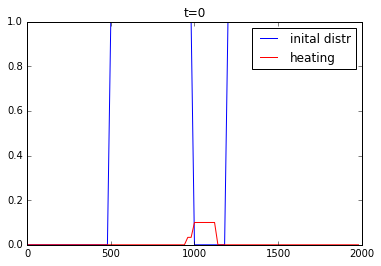

In [624]:

x_size = 100  # dim size
t_steps = 200   # time dim size
dx = 20
dt = 0.3
D =  20 #diff coef
# ini func via Heaviside
U0 = np.zeros(x_size)
U0[x_size//4:] = 1.
U0[x_size//2:x_size//2+10]=0.

#init 'heater'
H = np.zeros(x_size)
H[x_size//2-2:x_size//2+7]=0.1
H/=(2*U0+1.)
    
plt.plot(dx*np.arange(len(U0)),U0,label='inital distr')
plt.plot(dx*np.arange(len(H)),H,color='r',label='heating')
plt.title('t=0')
plt.legend()
plt.show()

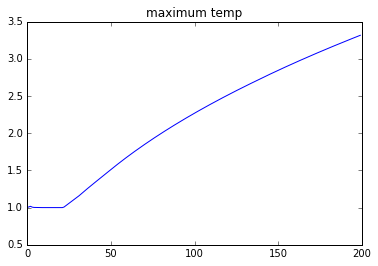

In [625]:
# init with U0
U_ti = U0
U = [U_ti[1:]]
maxs = [max(U_ti)]

for ti in range(1,t_steps):
    U_next = []
    U_ti = np.concatenate(([U_ti[-1]], U_ti, [U_ti[0]] ))    
    for xi in range(1,x_size):
        # pad torus-like
        # step!
        tt = dt/dx* D*( U_ti[xi-1] - 2*U_ti[xi] +U_ti[xi+1] ) + U_ti[xi] + dt*H[xi]
        U_next.append(tt)
    U_ti = np.array(U_next)
    maxs.append(max(U_ti))

    #print(max(U_ti),U_ti.shape)
    U.append(U_ti)
plt.plot(maxs)
plt.title('maximum temp')
    

In [626]:
U = np.array(U)
print(U)

[[0.         0.         0.         ... 1.         1.         1.        ]
 [0.3        0.         0.         ... 1.         1.         1.        ]
 [0.42       0.09       0.         ... 1.         1.         0.79      ]
 ...
 [0.50458011 0.47117854 0.43884544 ... 0.60707404 0.57292896 0.53863324]
 [0.50477558 0.47149908 0.43929101 ... 0.60691775 0.57288377 0.53870602]
 [0.50497176 0.47181961 0.43973581 ... 0.60676409 0.57284064 0.53878021]]


(200, 99)


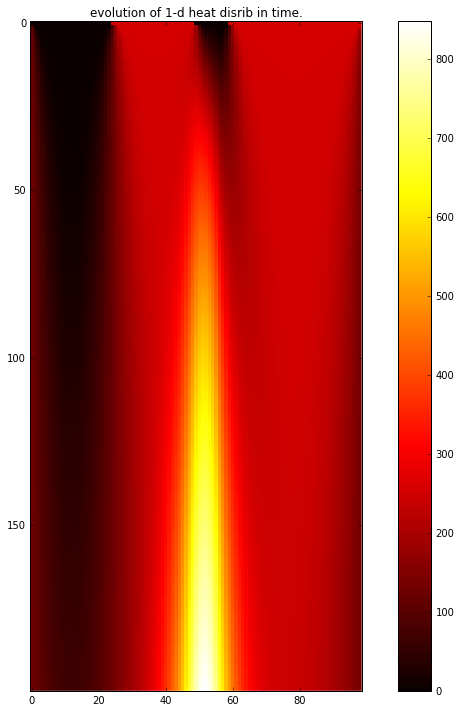

In [627]:
U=np.array(U*256)
print(U.shape)
f,ax = plt.subplots(1,1,figsize=(13,12))
ff = ax.imshow(U.astype(np.int),cmap='hot',interpolation='none')
f.colorbar(ff,ax=ax)
plt.title('evolution of 1-d heat disrib in time.')
